<a href="https://colab.research.google.com/github/teddytesfa/Build-AI-CodeAgents-Using-Huggingface-Smolagent-Library/blob/main/building_AI_agents_that_utilize_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Agents by Leverage Tool Creation Methods Provided by smolagents Library

This notebook demonistate how to build agents that use tools to perform various actions. In smolagents, tools are treated as functions that an LLM can call within an agent system.

In smolagents, tools can be defined in two ways:

1. Using the @tool decorator for simple function-based tools
2. Creating a subclass of Tool for more complex functionality

## Install the dependencies

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Initialize the InferenceClientModel to use the  Qwen/Qwen3-Coder-30B-A3B-Instruct LLM model via Nebius Inference provider:

In [ ]:
model=InferenceClientModel(model_id="Qwen/Qwen3-Coder-30B-A3B-Instruct", provider="nebius", api_key=userdata.get("HF_NEBIUS_API_KEY"))


## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service



# model = InferenceClientModel(provider="nebius")


agent = CodeAgent(tools=[catering_service_tool], model=model)

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Coder-30B-A3B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = catering_service_tool(query="best catering service in Gotham City")                                     
  print(result)                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 0.63 seconds| Input tokens: 1,993 | Output tokens: 41]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Gotham Catering Co.

[Step 2: Duration 0.57 seconds| Input tokens: 4,111 | Output tokens: 75]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [ ]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=model)

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Coder-30B-A3B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category="villain masquerade")                                      
  print(theme_idea)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.12 seconds| Input tokens: 2,028 | Output tokens: 28]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 0.45 seconds| Input tokens: 4,187 | Output tokens: 58]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("teddy-tesfa/catering_service_tool", token=userdata.get("HF_TOKEN"))

README.md:   0%|          | 0.00/242 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/teddy-tesfa/catering_service_tool/commit/25923a8e13b2ada8d5849a443bfc73d7bce6e80c', commit_message='Upload tool', commit_description='', oid='25923a8e13b2ada8d5849a443bfc73d7bce6e80c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/teddy-tesfa/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='teddy-tesfa/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Coder-30B-A3B-Instruct ──────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator("A luxurious superhero-themed party at Wayne Manor with made-up superheroes. The manor   
  is opulent with grand staircases and crystal chandeliers. Several fictional superheroes with unique powers are   
  attending the party, some in elegant costumes, others in their superhero outfits. There are floating lights,     
  champagne glasses, and a sophisticated atmosphere with luxury decorations and futuristic elements.")             
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x7F5290734FB0>

[Step 1: Duration 2.80 seconds| Input tokens: 2,023 | Output tokens: 124]

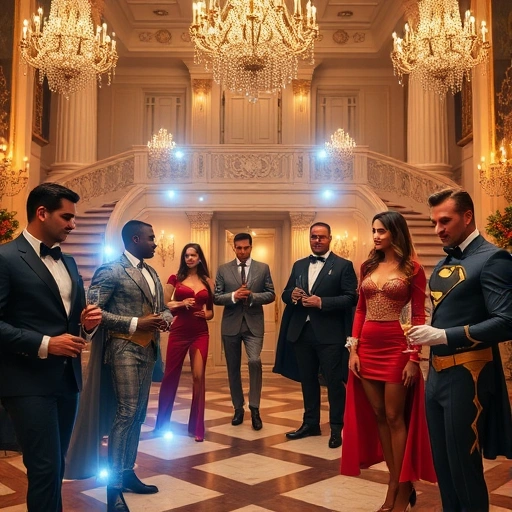

In [ ]:
from smolagents import load_tool, CodeAgent, InferenceClientModel
from IPython.display import display
from PIL import Image as PILImage # Import PIL.Image and alias it as PILImage

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=model
)

result = agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

# Assuming the agent's run method returns the PIL Image object or a path to it
# If it returns the PIL Image object directly:
if isinstance(result, PILImage.Image):
    display(result)
# If it returns a path to the image:
elif isinstance(result, str) and result.endswith(('.png', '.jpg', '.jpeg', '.gif', '.webp')):
     img = PILImage.open(result)
     display(img)

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [ ]:
!pip install gradio_client

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, Tool
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image as PILImage

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

# model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

result = agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)


# Assuming the agent's run method returns the PIL Image object or a path to it
# If it returns the PIL Image object directly:
if isinstance(result, PILImage.Image):
     display(result)
# If it returns a path to the image:
elif isinstance(result, str) and result.endswith(('.png', '.jpg', '.jpeg', '.gif', '.webp')):
     img = PILImage.open(result)
     display(img)

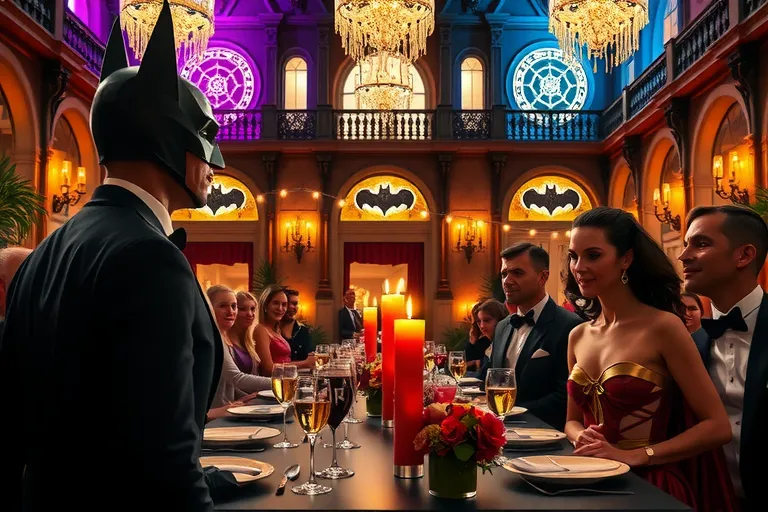

In [ ]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/20ddbcf66e82363933f32379374327258f42091195fedd29b45596c6d612d114/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

## Importing a tool collection from any MCP server
smolagents also allows importing tools from the hundreds of MCP servers available on glama.ai or smithery.ai.

We first need to install the mcp integration for smolagents.

In [ ]:
!pip install "smolagents[mcp]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 4.6 MB/s eta 0:00:00


The MCP servers tools can be loaded in a ToolCollection object as follow:

In [ ]:
import os
from smolagents import ToolCollection, CodeAgent
from mcp import StdioServerParameters
from smolagents import InferenceClientModel
from google.colab import userdata

server_parameters = {
    "url": "https://mcp.notion.com/mcp",
    "transport": "streamable-http",
    "headers": {
        "NOTION_TOKEN": userdata.get("NOTION_TOKEN")
    }
}

with ToolCollection.from_mcp(server_parameters, trust_remote_code=True) as tool_collection:
    agent = CodeAgent(
        tools=[*tool_collection.tools],
        model=model,
        add_base_tools=True
    )
    agent.run("Please find a remedy for hangover.")

Exception in thread Thread-9 (_run_loop):
  + Exception Group Traceback (most recent call last):
  |   File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
  |     self.run()
  |   File "/usr/lib/python3.12/threading.py", line 1012, in run
  |     self._target(*self._args, **self._kwargs)
  |   File "/usr/local/lib/python3.12/dist-packages/mcpadapt/core.py", line 237, in _run_loop
  |     self.loop.run_until_complete(self.task)
  |   File "/usr/lib/python3.12/asyncio/base_events.py", line 691, in run_until_complete
  |     return future.result()
  |            ^^^^^^^^^^^^^^^
  |   File "/usr/local/lib/python3.12/dist-packages/mcpadapt/core.py", line 226, in setup
  |     await stack.enter_async_context(
  |   File "/usr/lib/python3.12/contextlib.py", line 659, in enter_async_context
  |     result = await _enter(cm)
  |              ^^^^^^^^^^^^^^^^
  |   File "/usr/lib/python3.12/contextlib.py", line 210, in __aenter__
  |     return await anext(self.gen)
  |      

TimeoutError: Couldn't connect to the MCP server after 30 seconds